<a href="https://www.kaggle.com/code/saramilani/loan-prediction?scriptVersionId=177933055" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**About Dataset**

publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

**What columns represent**
1. **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

2. **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

3. **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

4. **installment**: The monthly installments owed by the borrower if the loan is funded.

5. **log.annual.inc**: The natural log of the self-reported annual income of the borrower.

6. **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

7. **fico**: The FICO credit score of the borrower.

8. **days.with.cr.line**: The number of days the borrower has had a credit line.

9. **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

10. **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

11. **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.

12. **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

13. **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

14. **not.fully.paid**: This is our target.


In [1]:
import pandas as pd
file_path = '/kaggle/input/loan-data/loan_data.csv'
data = pd.read_csv(file_path)
print("Data has loaded successfully , first few rows are :")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

Data has loaded successfully , first few rows are :
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  

In [2]:
# Convert 'not.fully.paid' and 'credit.policy' to boolean 
data['not.fully.paid'] = data['not.fully.paid'].astype(bool)
data['credit.policy'] = data['credit.policy'].astype(bool)

# Display the data types to confirm the change
print(data.dtypes)

credit.policy           bool
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid          bool
dtype: object


In [3]:
max_inquiries = data['inq.last.6mths'].max()
print(f"Maximum inquiries in the last 6 months: {max_inquiries}")

Maximum inquiries in the last 6 months: 33


In [4]:
import pandas as pd

# Calculate sorted unique values and their percentage for 'inq.last.6mths'
inq_last_6mths_counts = data['inq.last.6mths'].value_counts(normalize=True).sort_index() * 100

# Calculate sorted unique values and their percentage for 'delinq.2yrs'
delinq_2yrs_counts = data['delinq.2yrs'].value_counts(normalize=True).sort_index() * 100

# Calculate sorted unique values and their percentage for 'pub.rec'
pub_rec_counts = data['pub.rec'].value_counts(normalize=True).sort_index() * 100

# Display the results
print("Inquiries in the Last 6 Months (inq.last.6mths) - Percentages:")
print(inq_last_6mths_counts)
print("\nDelinquencies in the Past 2 Years (delinq.2yrs) - Percentages:")
print(delinq_2yrs_counts)
print("\nDerogatory Public Records (pub.rec) - Percentages:")
print(pub_rec_counts)

Inquiries in the Last 6 Months (inq.last.6mths) - Percentages:
inq.last.6mths
0     37.972437
1     25.704740
2     14.449781
3      9.020672
4      4.959282
5      2.902485
6      1.722698
7      1.044059
8      0.751723
9      0.490708
10     0.240134
11     0.156609
12     0.156609
13     0.062644
14     0.062644
15     0.093965
16     0.031322
17     0.020881
18     0.041762
19     0.020881
20     0.010441
24     0.020881
25     0.010441
27     0.010441
28     0.010441
31     0.010441
32     0.010441
33     0.010441
Name: proportion, dtype: float64

Delinquencies in the Past 2 Years (delinq.2yrs) - Percentages:
delinq.2yrs
0     88.306536
1      8.686573
2      2.004594
3      0.678639
4      0.198371
5      0.062644
6      0.020881
7      0.010441
8      0.010441
11     0.010441
13     0.010441
Name: proportion, dtype: float64

Derogatory Public Records (pub.rec) - Percentages:
pub.rec
0    94.163708
1     5.564836
2     0.198371
3     0.052203
4     0.010441
5     0.010441
Name: 

In [5]:
# Discretization Using numpy.select()
import numpy as np

# Conditions for 'inq.last.6mths'
conditions_inq = [
    (data['inq.last.6mths'] == 0),
    (data['inq.last.6mths'].between(1, 2)),
    (data['inq.last.6mths'] >= 3)
]
# Corresponding categories
choices_inq = ['0 inquiries', '1-2 inquiries', '3+ inquiries']
data['inq.last.6mths.categorized'] = np.select(conditions_inq, choices_inq, default='Unknown')

# Conditions for 'delinq.2yrs'
conditions_delinq = [
    (data['delinq.2yrs'] == 0),
    (data['delinq.2yrs'] == 1),
    (data['delinq.2yrs'] >= 2)
]
# Corresponding categories
choices_delinq = ['0 delinquencies', '1 delinquency', '2+ delinquencies']
data['delinq.2yrs.categorized'] = np.select(conditions_delinq, choices_delinq, default='Unknown')

# Conditions for 'pub.rec'
conditions_pub_rec = [
    (data['pub.rec'] == 0),
    (data['pub.rec'] == 1),
    (data['pub.rec'] >= 2)
]
# Corresponding categories
choices_pub_rec = ['0 records', '1 record', '2+ records']
data['pub.rec.categorized'] = np.select(conditions_pub_rec, choices_pub_rec, default='Unknown')

# Display the first few rows to verify the categorization
print(data[['inq.last.6mths.categorized', 'delinq.2yrs.categorized', 'pub.rec.categorized']].head())

  inq.last.6mths.categorized delinq.2yrs.categorized pub.rec.categorized
0                0 inquiries         0 delinquencies           0 records
1                0 inquiries         0 delinquencies           0 records
2              1-2 inquiries         0 delinquencies           0 records
3              1-2 inquiries         0 delinquencies           0 records
4                0 inquiries           1 delinquency           0 records


In [6]:
import numpy as np


# Define conditions for custom binning
conditions = [
    (data['inq.last.6mths'] == 0),
    (data['inq.last.6mths'].isin([1, 2])),
    (data['inq.last.6mths'].isin([3, 4, 5])),
    (data['inq.last.6mths'] > 5)
]

# Define labels for the bins
labels = ['bin1: 0', 'bin2: 1-2', 'bin3: 3-5', 'bin4: >5']

# Apply conditions and labels to create a new binned column
data['inq.last.6mths.binned'] = np.select(conditions, labels, default='Unknown')

# Calculate the distribution of the new discrete labels as percentages
distribution_percentages = data['inq.last.6mths.binned'].value_counts(normalize=True) * 100

# Display the distribution percentages
distribution_percentages


inq.last.6mths.binned
bin2: 1-2    40.154521
bin1: 0      37.972437
bin3: 3-5    16.882439
bin4: >5      4.990603
Name: proportion, dtype: float64

In [7]:

# Custom binning for 'delinq.2yrs'
conditions_delinq = [
    (data['delinq.2yrs'] == 0),
    (data['delinq.2yrs'] == 1),
    (data['delinq.2yrs'] >= 2)
]
labels_delinq = ['0 delinquencies', '1 delinquency', '2+ delinquencies']
data['delinq.2yrs.binned'] = np.select(conditions_delinq, labels_delinq)

# Custom binning for 'pub.rec'
conditions_pub_rec = [
    (data['pub.rec'] == 0),
    (data['pub.rec'] == 1),
    (data['pub.rec'] >= 2)
]
labels_pub_rec = ['0 records', '1 record', '2+ records']
data['pub.rec.binned'] = np.select(conditions_pub_rec, labels_pub_rec)

# Calculate and sort the distribution of the new discrete labels as percentages for 'delinq.2yrs'
distribution_delinq = data['delinq.2yrs.binned'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Calculate and sort the distribution of the new discrete labels as percentages for 'pub.rec'
distribution_pub_rec = data['pub.rec.binned'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Display the sorted distribution percentages for both features
print("Distribution for 'delinq.2yrs':")
print(distribution_delinq)
print("\nDistribution for 'pub.rec':")
print(distribution_pub_rec)


Distribution for 'delinq.2yrs':
delinq.2yrs.binned
0 delinquencies     88.306536
1 delinquency        8.686573
2+ delinquencies     3.006891
Name: proportion, dtype: float64

Distribution for 'pub.rec':
pub.rec.binned
0 records     94.163708
1 record       5.564836
2+ records     0.271455
Name: proportion, dtype: float64


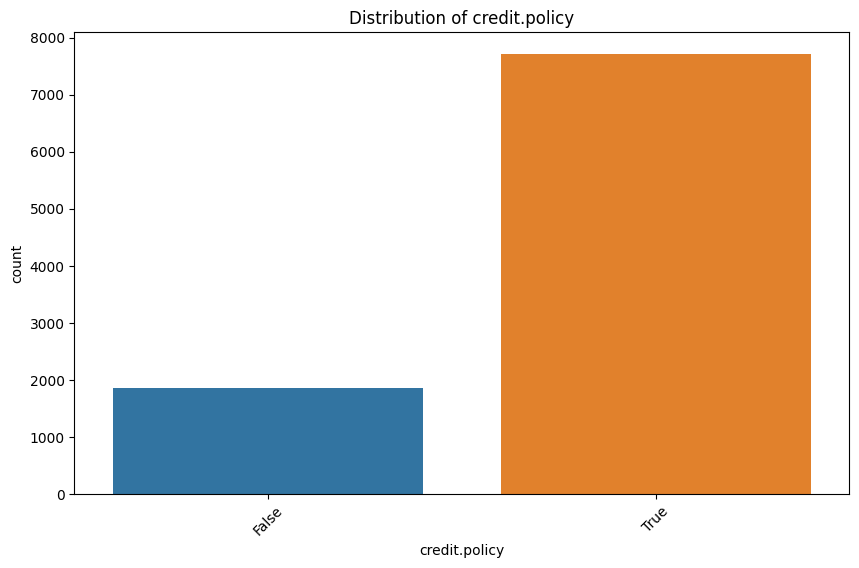

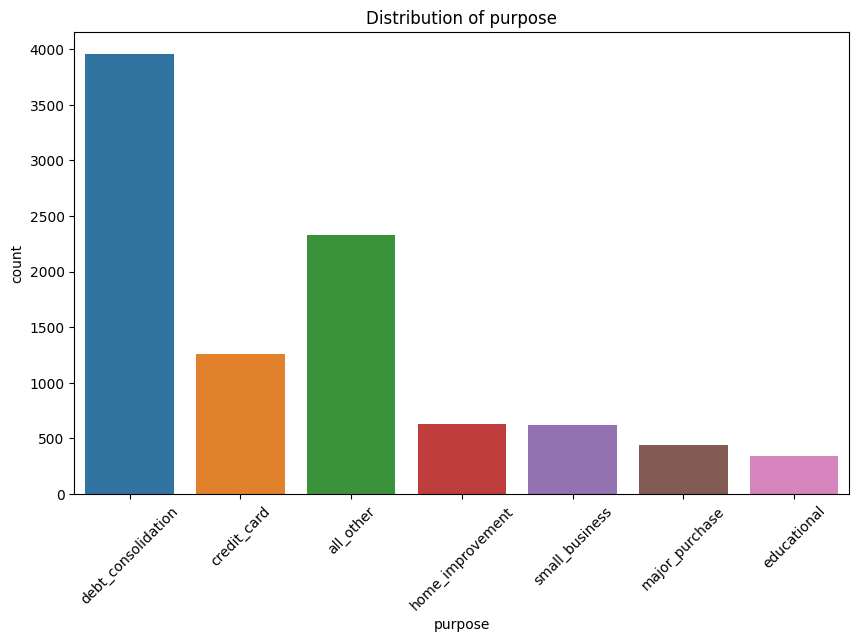

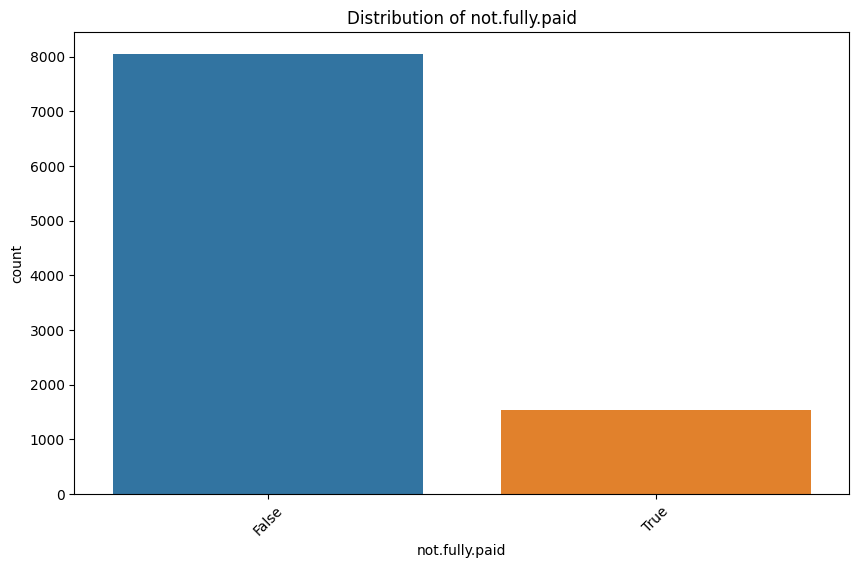

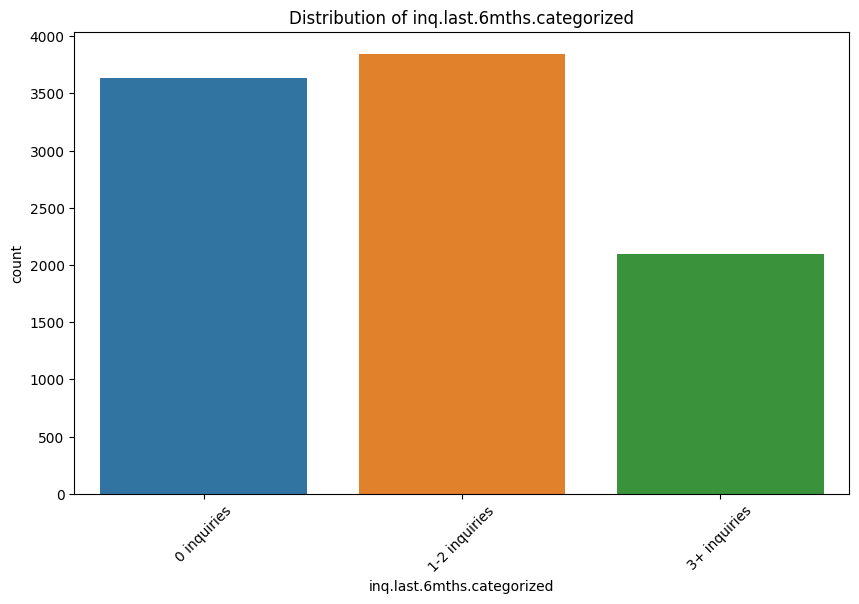

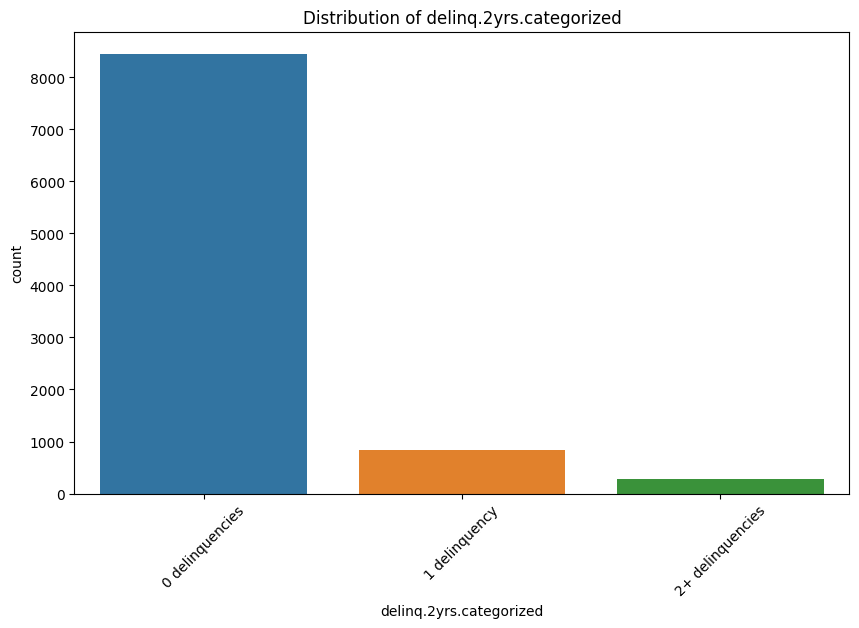

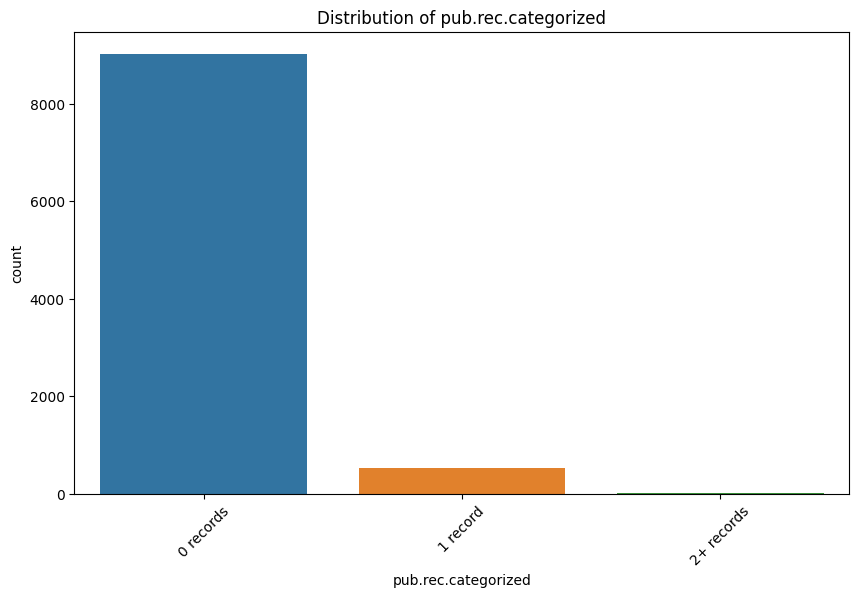

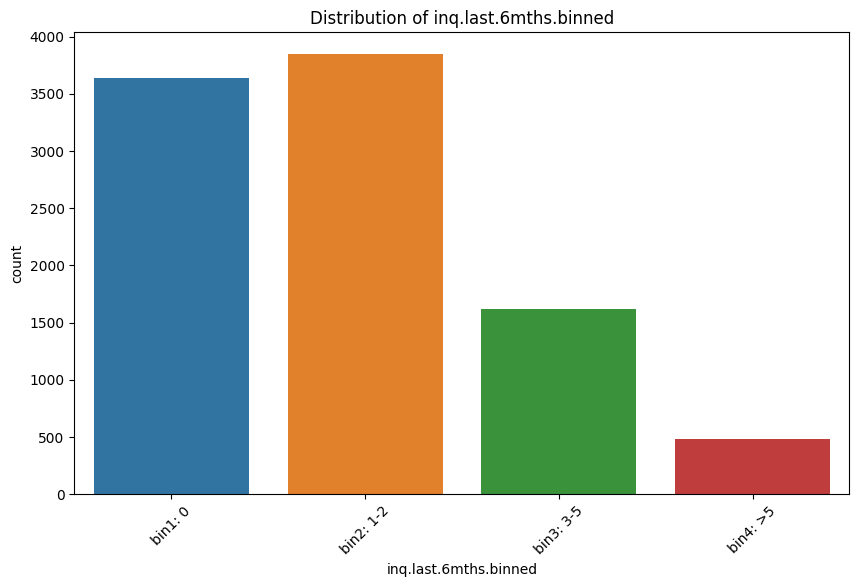

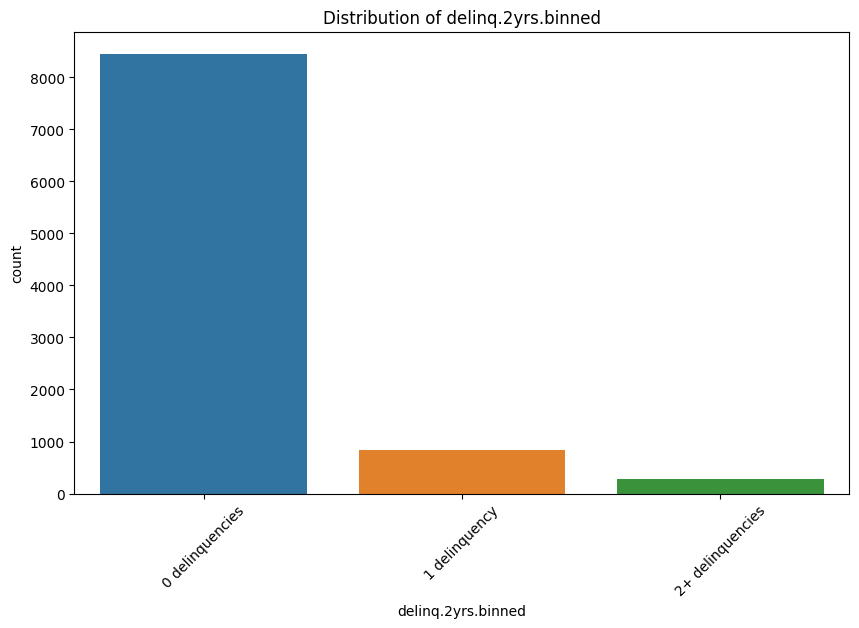

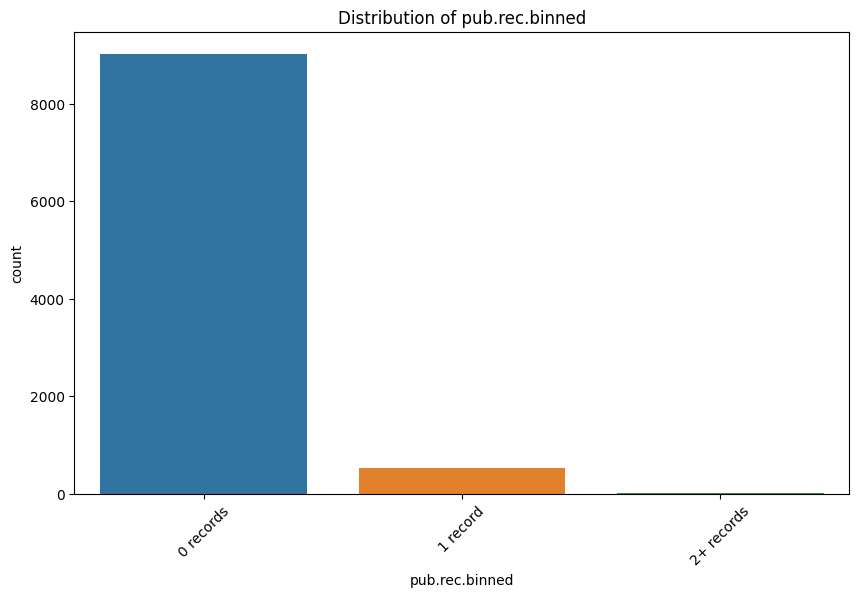

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identify categorical features (object and boolean types)
categorical_features = data.select_dtypes(include=['object', 'bool']).columns

# Plotting
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap, if necessary
    plt.show()


In [9]:
# Filter records where revol.util is over 100%
over_100_util = data[data['revol.util'] > 100]

# Display these records
print(over_100_util)

      credit.policy             purpose  int.rate  installment  \
7777          False         credit_card    0.1438        42.96   
7895          False  debt_consolidation    0.1438       149.48   
7914          False  debt_consolidation    0.1186        23.21   
7922          False         credit_card    0.1438       359.95   
7923          False           all_other    0.0933       287.59   
7957          False  debt_consolidation    0.1786        88.41   
7982          False         credit_card    0.1438       137.45   
7991          False           all_other    0.0996        51.60   
8056          False           all_other    0.1059        78.11   
8073          False         educational    0.1375       495.52   
8091          False  debt_consolidation    0.1691       154.90   
8129          False  debt_consolidation    0.1583       701.47   
8176          False  debt_consolidation    0.1425       171.50   
8187          False         credit_card    0.1078       293.72   
8203      

In [10]:
# Change all 'revol.util' values over 100% to exactly 100%
data['revol.util'] = data['revol.util'].apply(lambda x: 100 if x > 100 else x)

# Verify the changes by checking to see if there are any values over 100%
max_revol_util_after_change = data['revol.util'].max()

max_revol_util_after_change


100.0

In [11]:
# Display records where 'revol.util' has been changed to 100
changed_to_100_records = data[data['revol.util'] == 100]

changed_to_100_records


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,inq.last.6mths.categorized,delinq.2yrs.categorized,pub.rec.categorized,inq.last.6mths.binned,delinq.2yrs.binned,pub.rec.binned
7777,False,credit_card,0.1438,42.96,9.210340,5.64,632,660.000000,1269,100.0,1,0,0,False,1-2 inquiries,0 delinquencies,0 records,bin2: 1-2,0 delinquencies,0 records
7895,False,debt_consolidation,0.1438,149.48,9.852194,13.45,642,1139.000000,2422,100.0,3,0,0,False,3+ inquiries,0 delinquencies,0 records,bin3: 3-5,0 delinquencies,0 records
7914,False,debt_consolidation,0.1186,23.21,10.060491,11.33,657,2879.958333,4479,100.0,1,0,0,True,1-2 inquiries,0 delinquencies,0 records,bin2: 1-2,0 delinquencies,0 records
7922,False,credit_card,0.1438,359.95,11.245046,9.98,642,4679.958333,15918,100.0,6,0,0,True,3+ inquiries,0 delinquencies,0 records,bin4: >5,0 delinquencies,0 records
7923,False,all_other,0.0933,287.59,9.615805,13.36,717,3268.958333,2588,100.0,0,0,0,True,0 inquiries,0 delinquencies,0 records,bin1: 0,0 delinquencies,0 records
7957,False,debt_consolidation,0.1786,88.41,10.915088,9.62,612,1230.000000,1190,100.0,15,0,0,False,3+ inquiries,0 delinquencies,0 records,bin4: >5,0 delinquencies,0 records
7982,False,credit_card,0.1438,137.45,9.615805,16.32,647,1049.000000,4364,100.0,5,0,0,True,3+ inquiries,0 delinquencies,0 records,bin3: 3-5,0 delinquencies,0 records
7991,False,all_other,0.0996,51.60,9.798127,10.33,682,2910.000000,6646,100.0,1,0,0,True,1-2 inquiries,0 delinquencies,0 records,bin2: 1-2,0 delinquencies,0 records
8056,False,all_other,0.1059,78.11,10.032408,5.70,672,3150.041667,3613,100.0,1,1,0,False,1-2 inquiries,1 delinquency,0 records,bin2: 1-2,1 delinquency,0 records
8073,False,educational,0.1375,495.52,11.338572,19.10,662,6660.041667,26710,100.0,3,0,0,False,3+ inquiries,0 delinquencies,0 records,bin3: 3-5,0 delinquencies,0 records


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

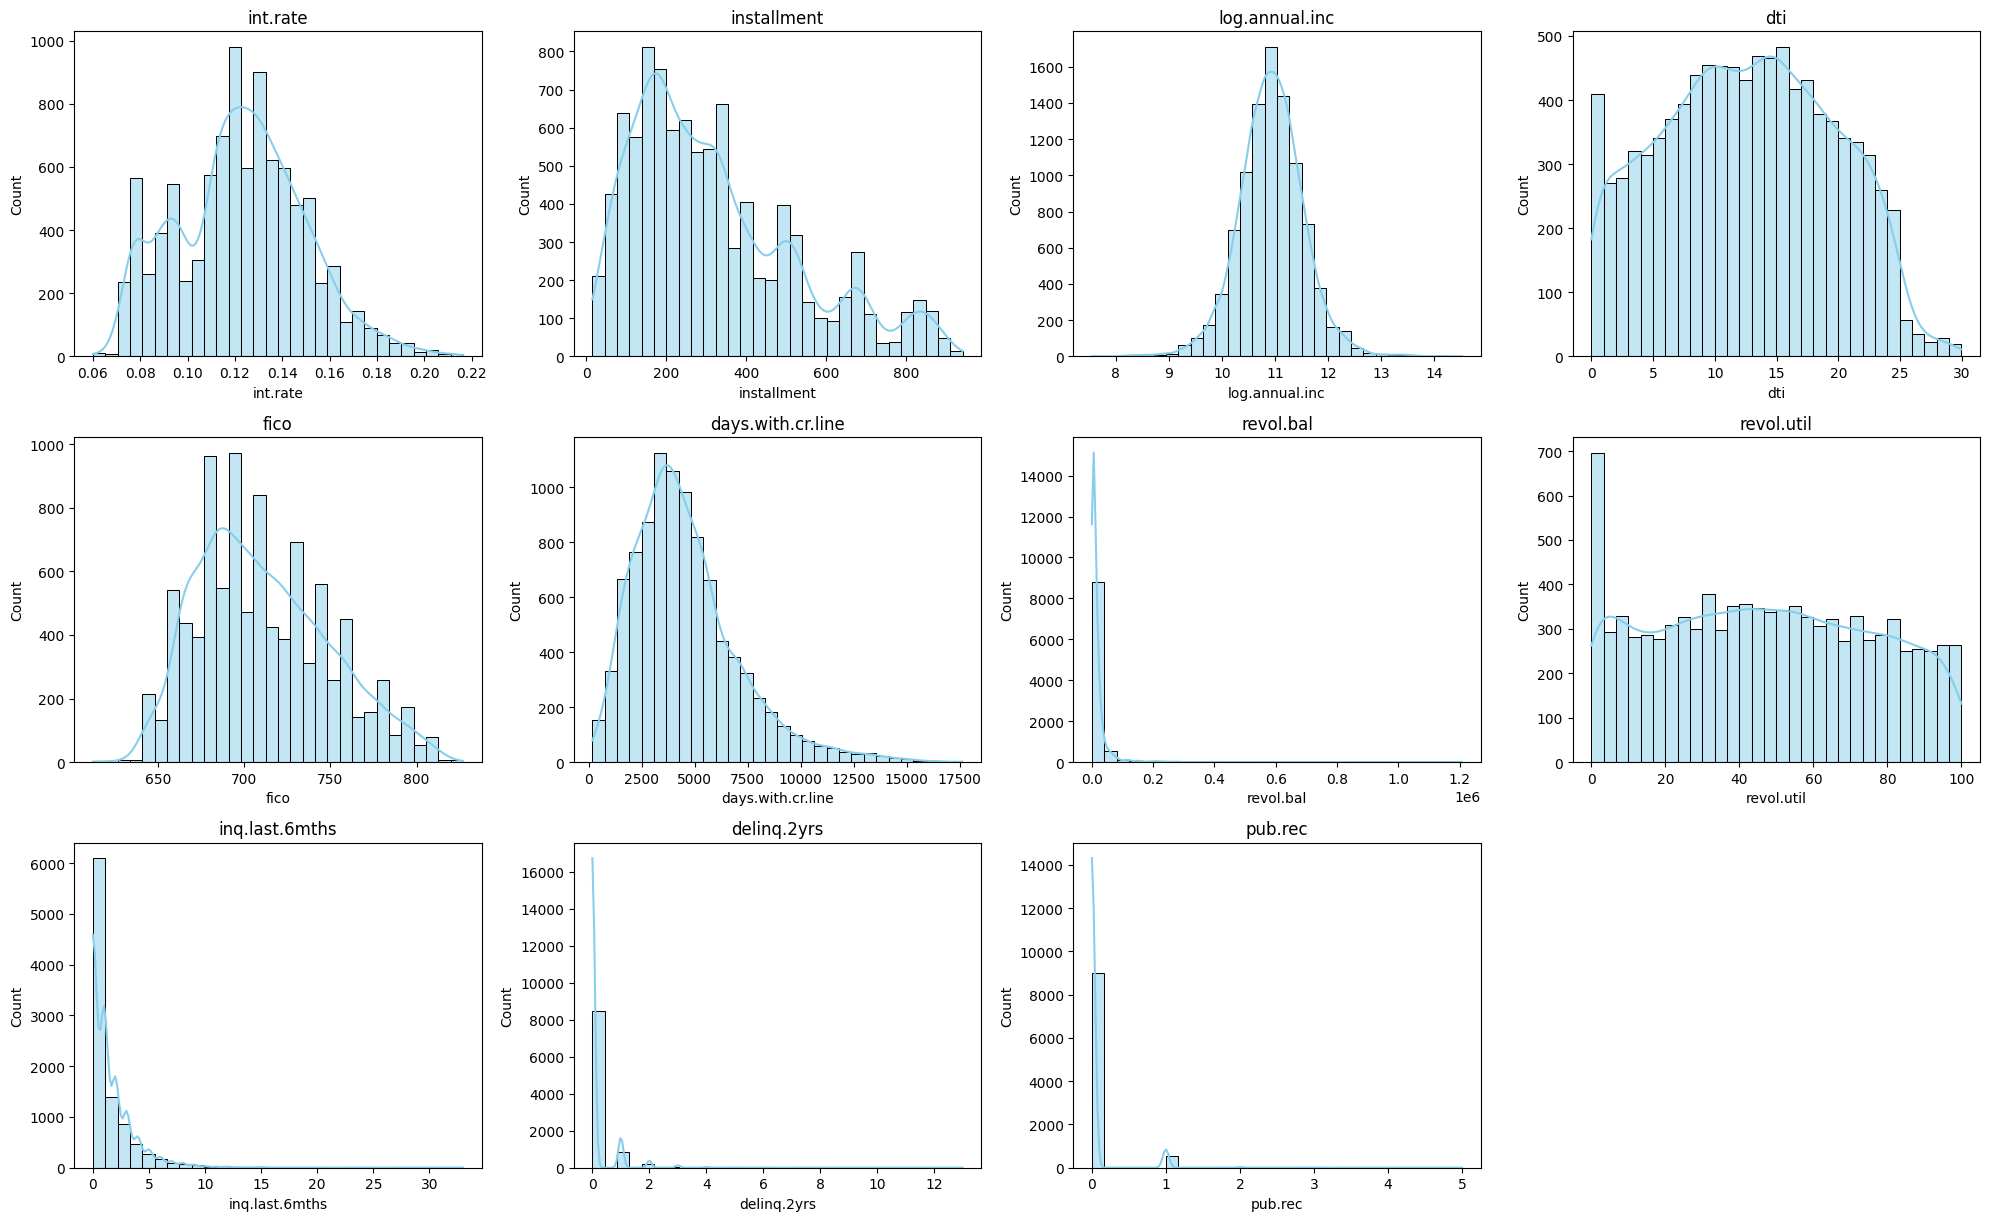

In [12]:
# Select numerical columns (int and float types) from the dataframe
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for all numerical features
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
# Perform one-hot encoding on the 'purpose' feature
#purpose_dummies = pd.get_dummies(data['purpose'], prefix='purpose')

# Concatenate the original DataFrame 'df' with the one-hot encoded DataFrame 'purpose_dummies'
#df_encoded = pd.concat([data, purpose_dummies], axis=1)

# Drop the original 'purpose' column
#df_encoded = df_encoded.drop('purpose', axis=1)

# Display the first few rows of the updated DataFrame to verify the column has been dropped
#print(df_encoded.head())

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


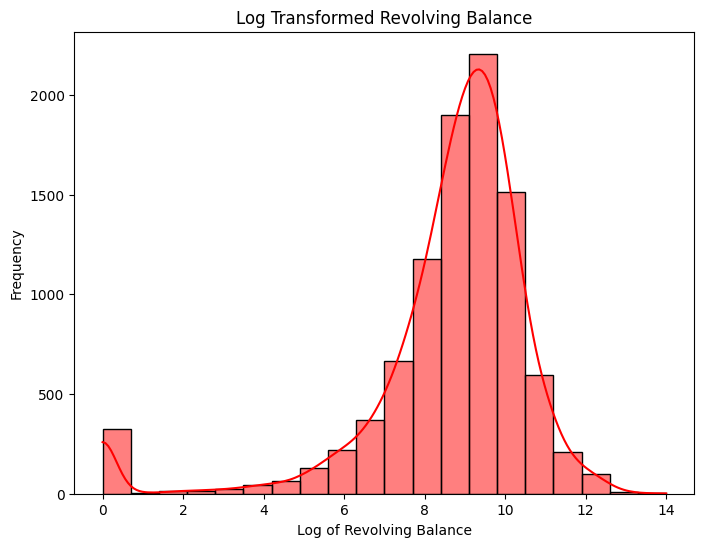

In [14]:
# Apply a logarithmic transformation to 'revol.bal', adding 1 to avoid log(0)
data['log_revol_bal'] = np.log(data['revol.bal'] + 1)

# Plot the histogram of the transformed 'revol.bal'
plt.figure(figsize=(8, 6))
sns.histplot(data['log_revol_bal'], bins=20, kde=True, color='red')
plt.title('Log Transformed Revolving Balance')
plt.xlabel('Log of Revolving Balance')
plt.ylabel('Frequency')
plt.show()


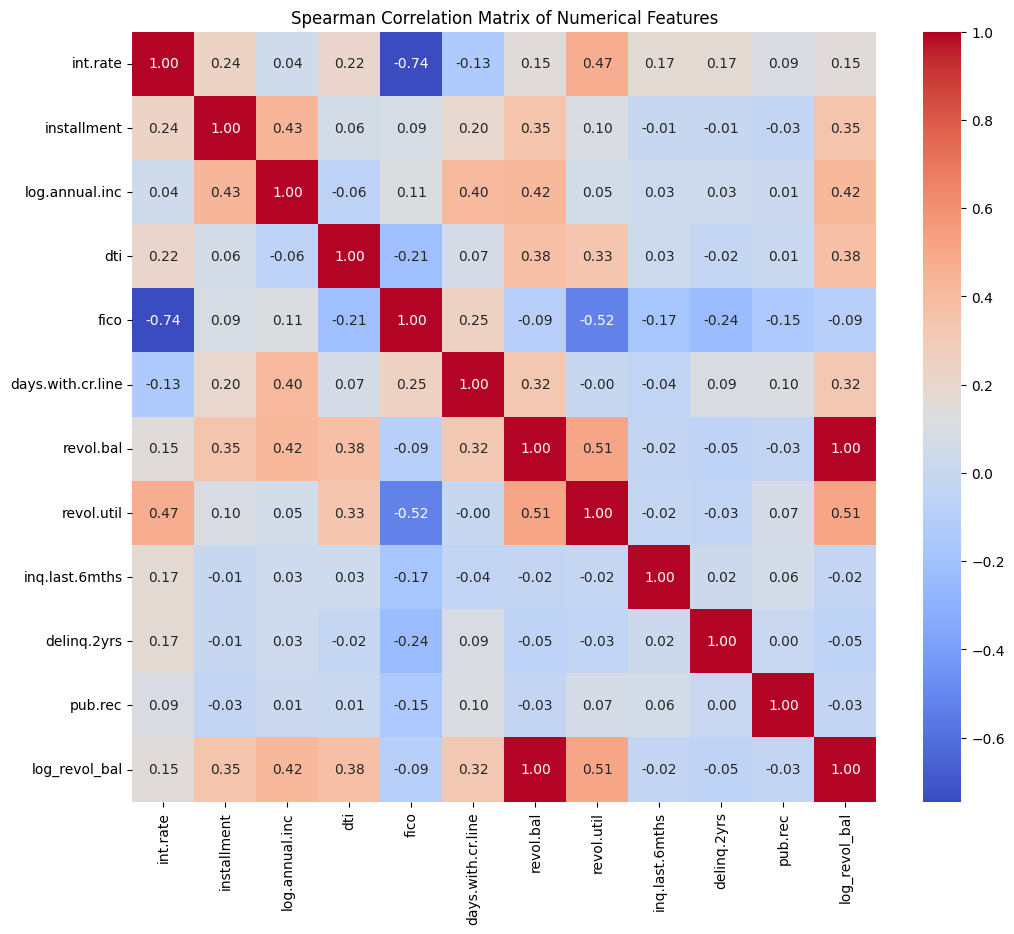

In [15]:
import matplotlib.pyplot as plt

# Select numerical columns (int and float types) only
numerical_df = data.select_dtypes(include=['int64', 'float64'])

# Calculate the Spearman correlation matrix
spearman_corr = numerical_df.corr(method='spearman')

# Plot the Spearman correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix of Numerical Features')
plt.show()


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   bool   
 1   purpose                     9578 non-null   object 
 2   int.rate                    9578 non-null   float64
 3   installment                 9578 non-null   float64
 4   log.annual.inc              9578 non-null   float64
 5   dti                         9578 non-null   float64
 6   fico                        9578 non-null   int64  
 7   days.with.cr.line           9578 non-null   float64
 8   revol.bal                   9578 non-null   int64  
 9   revol.util                  9578 non-null   float64
 10  inq.last.6mths              9578 non-null   int64  
 11  delinq.2yrs                 9578 non-null   int64  
 12  pub.rec                     9578 non-null   int64  
 13  not.fully.paid              9578 

In [17]:
# Perform one-hot encoding for the 'purpose' column
one_hot_encoded_purpose = pd.get_dummies(data['purpose'], prefix='purpose')

# Concatenate the one-hot encoded columns with the original DataFrame
data = pd.concat([data, one_hot_encoded_purpose], axis=1)

# Drop the original 'purpose' column, as it's no longer needed
data.drop('purpose', axis=1, inplace=True)

# Display the updated DataFrame with one-hot encoding
print(data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0        5639.958333      28854        52.1               0  ...   
1        2760.000000      33623        76.7               0  ...   
2        4710.000000       3511        25.6               1  ...   
3        2699.958333      33667        73.2               1  ...   
4        4066.000000       4740        39.5               0  ...   

   delinq.2yrs.binned  pub.rec.binned  log_revol_bal purpose_all_other  \
0     0 delinquencies       0 records      10.270039             False   
1     0 de

In [18]:
for column in data.select_dtypes(include=['category']).columns:
    data[column], _ = pd.factorize(data[column])

# Display the first few rows of the DataFrame to verify the changes
print(data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0        5639.958333      28854        52.1               0  ...   
1        2760.000000      33623        76.7               0  ...   
2        4710.000000       3511        25.6               1  ...   
3        2699.958333      33667        73.2               1  ...   
4        4066.000000       4740        39.5               0  ...   

   delinq.2yrs.binned  pub.rec.binned  log_revol_bal purpose_all_other  \
0     0 delinquencies       0 records      10.270039             False   
1     0 de

In [19]:
# Convert to 'category' type if not already
data['inq.last.6mths.categorized'] = data['inq.last.6mths.categorized'].astype('category')
data['delinq.2yrs.categorized'] = data['delinq.2yrs.categorized'].astype('category')
data['pub.rec.categorized'] = data['pub.rec.categorized'].astype('category')

# Apply label encoding
columns_to_encode = ['inq.last.6mths.categorized', 'delinq.2yrs.categorized', 'pub.rec.categorized']
for column in columns_to_encode:
    data[column], _ = pd.factorize(data[column])

# Display the first few rows of the DataFrame to verify the changes
print(data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0        5639.958333      28854        52.1               0  ...   
1        2760.000000      33623        76.7               0  ...   
2        4710.000000       3511        25.6               1  ...   
3        2699.958333      33667        73.2               1  ...   
4        4066.000000       4740        39.5               0  ...   

   delinq.2yrs.binned  pub.rec.binned  log_revol_bal  purpose_all_other  \
0     0 delinquencies       0 records      10.270039              False   
1     0 

In [20]:
 # Convert to 'category' type if not already
data['inq.last.6mths.binned'] = data['inq.last.6mths.binned'].astype('category')
data['delinq.2yrs.binned'] = data['delinq.2yrs.binned'].astype('category')
data['pub.rec.binned'] = data['pub.rec.binned'].astype('category')

# Apply label encoding
columns_to_encode = ['inq.last.6mths.binned', 'delinq.2yrs.binned', 'pub.rec.binned']
for column in columns_to_encode:
    data[column], _ = pd.factorize(data[column])

# Display the first few rows of the DataFrame to verify the changes
print(data.head())
    
   # inq.last.6mths.binned       9578 non-null   category
   #delinq.2yrs.binned          9578 non-null   category
   #pub.rec.binned              9578 non-null   object 

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0        5639.958333      28854        52.1               0  ...   
1        2760.000000      33623        76.7               0  ...   
2        4710.000000       3511        25.6               1  ...   
3        2699.958333      33667        73.2               1  ...   
4        4066.000000       4740        39.5               0  ...   

   delinq.2yrs.binned  pub.rec.binned  log_revol_bal  purpose_all_other  \
0                   0               0      10.270039              False   
1       

In [21]:
from sklearn.model_selection import train_test_split

# Define your target variable (not.fully.paid) and features
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7662, 26)
X_test shape: (1916, 26)
y_train shape: (7662,)
y_test shape: (1916,)


In [22]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns in the training and test sets
numerical_columns = X_train.select_dtypes(include=['int64', 'float64'])
numerical_columns_test = X_test.select_dtypes(include=['int64', 'float64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_columns.columns] = scaler.fit_transform(numerical_columns)

# Transform the test data using the same scaler
X_test[numerical_columns_test.columns] = scaler.transform(numerical_columns_test)

In [23]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,delinq.2yrs.binned,pub.rec.binned,log_revol_bal,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
7317,True,0.868707,0.049122,-1.535031,-0.172101,-0.498260,0.268636,-0.520199,-0.608260,-0.266751,...,-0.343875,-0.243567,-1.633740,False,False,False,False,False,True,False
350,True,-1.431963,-0.391757,0.475451,-0.948919,0.811133,-0.566438,-0.388802,-0.208505,-0.714472,...,-0.343875,-0.243567,-0.099480,False,True,False,False,False,False,False
5206,True,-0.283480,-0.865503,0.385937,-0.837116,0.156437,-0.302347,-0.144915,0.883928,-0.266751,...,-0.343875,-0.243567,0.365895,False,False,True,False,False,False,False
2673,True,-1.083713,1.015832,0.203709,-0.616412,0.549255,-0.194484,0.805094,1.335376,-0.714472,...,-0.343875,-0.243567,0.933546,True,False,False,False,False,False,False
3528,True,-0.364985,-0.024503,-0.393163,0.935774,1.203951,0.992200,-0.514108,-1.438785,-0.266751,...,-0.343875,-0.243567,-1.251671,False,False,False,False,False,True,False


In [24]:
X_test.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,delinq.2yrs.binned,pub.rec.binned,log_revol_bal,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
8558,False,1.187319,0.659518,-0.551198,0.279471,-1.414835,-0.302347,-0.253694,1.231991,0.628691,...,-0.343875,-0.243567,0.213059,False,False,True,False,False,False,False
4629,True,-0.153813,1.046473,0.362771,-0.247604,0.549255,-0.386254,-0.019038,-0.191274,0.628691,...,-0.343875,-0.243567,0.495554,False,False,True,False,False,False,False
1383,True,-0.290890,-0.578554,-0.956987,0.164763,-0.498260,-0.997593,-0.075759,1.356053,-0.714472,...,-0.343875,-0.243567,0.441664,False,True,False,False,False,False,False
8142,False,1.561502,-1.021902,0.111011,2.259996,-1.022017,0.764486,-0.275868,-0.711645,1.076412,...,1.967329,-0.243567,0.174401,True,False,False,False,False,False,False
1768,True,-0.013031,-0.761673,0.315524,-1.249483,-0.236381,0.189107,-0.509921,-1.352631,-0.266751,...,1.967329,-0.243567,-1.101934,True,False,False,False,False,False,False


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and test sets (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Print the evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("******************************************")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8392
Precision: 0.4118
Recall: 0.0230
F1 Score: 0.0435
ROC AUC Score: 0.7105
******************************************
Model: Random Forest
Accuracy: 0.8392
Precision: 0.4211
Recall: 0.0262
F1 Score: 0.0494
ROC AUC Score: 0.6703
******************************************
Model: XGBoost
Accuracy: 0.8304
Precision: 0.3529
Recall: 0.0787
F1 Score: 0.1287
ROC AUC Score: 0.6377
******************************************


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   bool   
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   bool   
 13  inq.last.6mths.categorized  9578 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


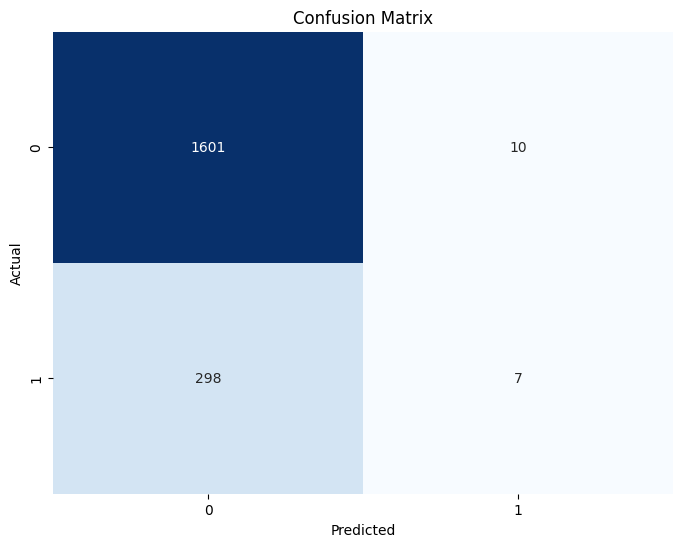

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained a model (e.g., Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

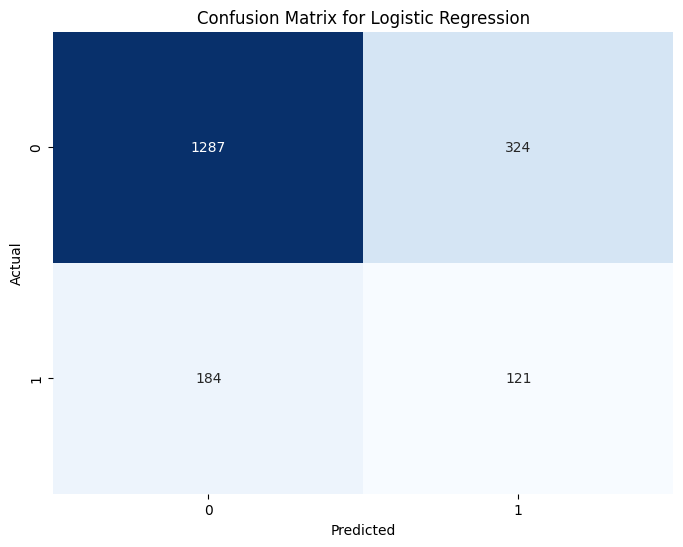

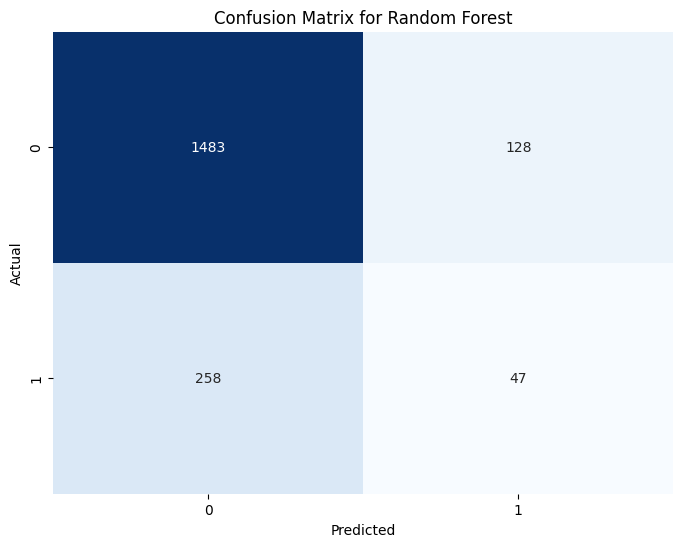

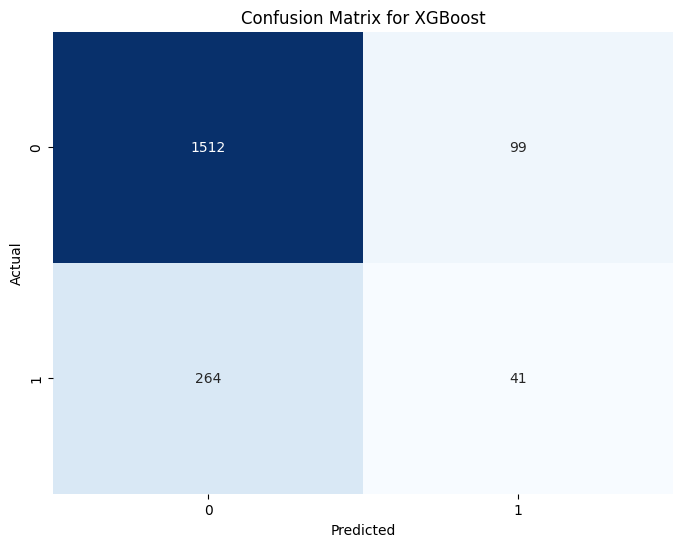

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and test sets (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # Generate a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()